
Tema: Regresion Logistica
Presentado a: Doctor Breyner Parra
Materia: Analisis de Datos
Estudiante: Juan Carlos Pulido Sierra

In [ ]:

*******************************************************************************************
Que es la regresion Logistica: La regresión logística es un método de análisis utilizado para predecir la probabilidad de que ocurra un evento binario. 
Modela la relación entre una variable dependiente categórica y una o más variables independientes, utilizando la función logística para estimar 
la probabilidad de que la variable dependiente sea una categoría específica.

*******************************************************************************************
Ejercicio Propuesto: Analizar el Dataset el cual contiene información de enfermedades del corazon. 
El objetivo es predecir el riesgo de infarto en función de sus atributos siguendo el siguiente modelo:



    1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
    2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
    3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
    4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
    5. Entrenar el modelo configurando los diferentes hiperparámetros
    6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
    7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
    8. Interpretar, analizar y documentar los resultados obtenidos
    9. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

In [1]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [44]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(50)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [45]:
# Descripción de los datos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

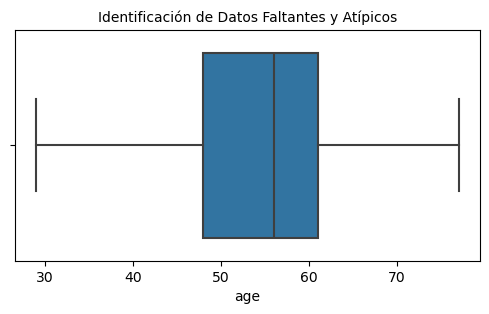

In [46]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [47]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en chest pain type: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Presion Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar en sangre: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en resting electrocardiographic results: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition de enfermedad: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en sexo:  96
Cantidad de Registros con cero en chest pain type:  23
Cantidad de Registros con cero en Presion Arterial:  0
Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Azucar en sangre:  254
Cantidad de Registros con cero en resting electrocardiographic results:  147
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en exang:  200
Cantidad de Registros con cero en oldpeak:  96
Cantidad de Registros con cero en slope:  139
Cantidad de Registros con cero en ca:  174
Cantidad de Registros con cero en thal:  164
Cantidad de Registros con cero en condition de enfermedad:  160


In [48]:
# Reemplazar todos los ceros con el valor medio (promedio) de la columna.

Datos['sex']=Datos['sex'].replace(0,Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())
Datos['condition']=Datos['condition'].replace(0,Datos['condition'].mean())

In [8]:
#Revisión nuevamente de datos faltantes

print("Cantidad de Registros con cero en edad: ",Datos['age'].isin([0]).sum())
print("Cantidad de Registros con cero en sexo: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en chest pain type: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Presion Arterial: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colesterol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Azucar en sangre: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en resting electrocardiographic results: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en condition de enfermedad: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en edad:  0
Cantidad de Registros con cero en sexo:  0
Cantidad de Registros con cero en chest pain type:  0
Cantidad de Registros con cero en Presion Arterial:  0
Cantidad de Registros con cero en Colesterol:  0
Cantidad de Registros con cero en Azucar en sangre:  0
Cantidad de Registros con cero en resting electrocardiographic results:  0
Cantidad de Registros con cero en thalach:  0
Cantidad de Registros con cero en exang:  0
Cantidad de Registros con cero en oldpeak:  0
Cantidad de Registros con cero en slope:  0
Cantidad de Registros con cero en ca:  0
Cantidad de Registros con cero en thal:  0
Cantidad de Registros con cero en condition de enfermedad:  0


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

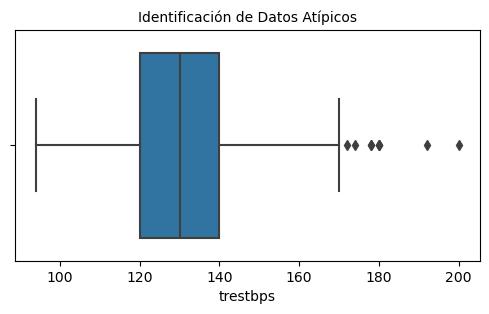

In [49]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['trestbps'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [50]:
#Conteo de Datos Atípicos

nivel_minimo=90
nivel_maximo=180
Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 2


In [51]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['trestbps']<nivel_maximo)&(Datos['trestbps']>nivel_minimo)]

In [52]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((Datos['trestbps']<nivel_minimo)|(Datos['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [53]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        292 non-null    int64  
 1   sex        292 non-null    float64
 2   cp         292 non-null    float64
 3   trestbps   292 non-null    int64  
 4   chol       292 non-null    int64  
 5   fbs        292 non-null    float64
 6   restecg    292 non-null    float64
 7   thalach    292 non-null    int64  
 8   exang      292 non-null    float64
 9   oldpeak    292 non-null    float64
 10  slope      292 non-null    float64
 11  ca         292 non-null    float64
 12  thal       292 non-null    float64
 13  condition  292 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 34.2 KB




Característica de interes:

   Enfermedad cardiaca: si la persona puede sufrir enfermedad cardiaca (0 = no puede sufrir enfermedad cardiaca - 1 = si puede sufrir enfermedad cardiaca)




In [68]:
# Total de personas con Diabetes

Datos['condition'].value_counts().astype(int)

condition
0.461279    159
1.000000    133
Name: count, dtype: int32

In [77]:
Datos['condition'] = Datos['condition'].round().astype(int)

In [78]:
Datos[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [79]:
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = Datos['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [80]:
print (X_train)

     age       sex   cp  trestbps  chol       fbs   restecg  thalach  \
268   48  1.000000  3.0       122   222  0.144781  2.000000      186   
53    48  1.000000  1.0       130   245  0.144781  2.000000      180   
208   59  1.000000  3.0       110   239  0.144781  2.000000      142   
74    70  1.000000  2.0       160   269  0.144781  0.996633      112   
290   41  1.000000  3.0       110   172  0.144781  2.000000      158   
..   ...       ...  ...       ...   ...       ...       ...      ...   
227   57  1.000000  3.0       110   201  0.144781  0.996633      126   
281   44  1.000000  3.0       110   197  0.144781  2.000000      177   
205   60  0.676768  3.0       158   305  0.144781  2.000000      161   
213   58  1.000000  3.0       114   318  0.144781  1.000000      140   
113   54  0.676768  2.0       160   201  0.144781  0.996633      163   

        exang   oldpeak     slope        ca      thal  
268  0.326599  1.055556  0.602694  0.676768  0.835017  
53   0.326599  0.200000

In [81]:
print (Y_train)

268    0
53     0
208    1
74     1
290    1
      ..
227    0
281    1
205    1
213    1
113    0
Name: condition, Length: 219, dtype: int32


In [84]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de

In [85]:
print (Y_test)

111    0
257    1
51     0
272    0
39     0
      ..
169    0
270    1
137    0
155    1
164    1
Name: condition, Length: 73, dtype: int32


In [86]:
print (Prediccion)

[1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1]


In [87]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.84      0.82      0.83        33

    accuracy                           0.85        73
   macro avg       0.85      0.85      0.85        73
weighted avg       0.85      0.85      0.85        73



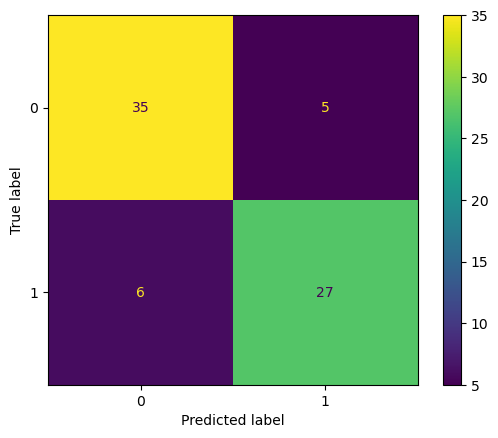

In [88]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

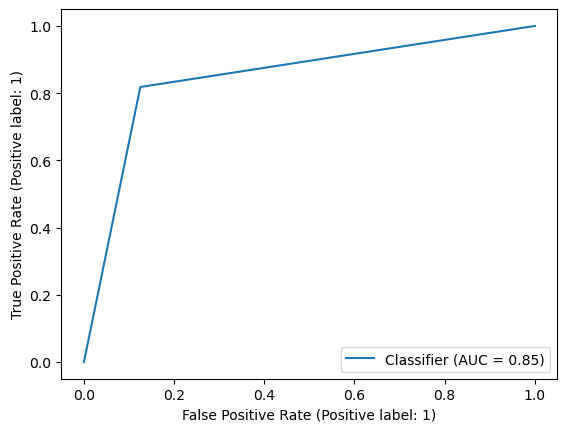

In [89]:
# Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

Analisis de los datos:

La precisión es la proporción de predicciones positivas que fueron clasificadas correctamente. En este caso, la precisión es 0.85. Esto significa que el 85% de las predicciones positivas realizadas por el modelo fueron correctasl:

El recall (o exhaustividad) es la proporción de instancias positivas que fueron clasificadas correctamente. En este caso, el recall también es 0.85. Esto significa que el modelo fue capaz de identificar correctamente el 85% de todas las instancias positscore:

El F1-score es la media armónica de precisión y recall. En este caso, el F1-score es 0.85. Esto indica un buen equilibrio entre precisión y recall, lo que sugiere que el modelo tiene un buen rendimiento en términos de clasificación de ambas 
clases.
Interpretación de la Matriz de Confusión:

La matriz de confusión proporciona una visión detallada del rendimiento dedelo:

    Verdaderos negativos (TN): Son las instancias que fueron clasificadas correctamente como negativas. En este caTN = 40.
    Verdaderos positivos (TP): Son las instancias que fueron clasificadas correctamente como positivas. Sin embargo, el valor no está proporcionado directamente en la matriz onfusión.
    F positivos (FP): Son las instancias que fueron clasificadas incorrectamente omo positivas (en realidad.zconfusión.
    s negativos (FN): Son las instancias que fueron clasificadas incorrectamentecomo negativas (en realida iz de confusión.



